# *E. coli* Simulations

In [1]:
# Make sure notebook runs out of vivarium-ecoli directory
import sys, os
notebook_path = sys.path[0][:sys.path[0].index('notebooks')]
sys.path.append(notebook_path)
os.chdir(sys.path[-1])
cwd = os.getcwd()

In [2]:
import os
from ecoli.experiments.ecoli_master_sim import EcoliSim, CONFIG_DIR_PATH
from vivarium.core.engine import pf
from vivarium.core.composer import Composite
from vivarium.plots.simulation_output import plot_variables
from vivarium.plots.topology import plot_topology
from ecoli.plots.topology import get_ecoli_master_topology_settings, get_partition_topology_settings

## *E. coli* non-partitioned

### initialize `EcoliSim` from file

In [3]:
sim_nonpartition = EcoliSim.from_file(CONFIG_DIR_PATH + "no_partition.json")
sim_nonpartition.total_time = 10
sim_nonpartition.divide = False
sim_nonpartition.progress_bar = False
sim_nonpartition.log_updates = False
sim_nonpartition.raw_output = False
sim_nonpartition.build_ecoli()

### print the processes

In [4]:
print(pf(sim_nonpartition.ecoli.processes))

{ 'ecoli-chromosome-replication': <ecoli.processes.chromosome_replication.ChromosomeReplication object at 0x12d4f6460>,
  'ecoli-chromosome-structure': <ecoli.processes.chromosome_structure.ChromosomeStructure object at 0x102737df0>,
  'ecoli-complexation': <ecoli.processes.complexation.Complexation object at 0x12aa5c550>,
  'ecoli-equilibrium': <ecoli.processes.equilibrium.Equilibrium object at 0x12d4f6340>,
  'ecoli-mass-listener': <ecoli.processes.listeners.mass_listener.MassListener object at 0x12aa5c130>,
  'ecoli-metabolism': <ecoli.processes.metabolism.Metabolism object at 0x123bc4400>,
  'ecoli-polypeptide-elongation': <ecoli.processes.polypeptide_elongation.PolypeptideElongation object at 0x12d4f60d0>,
  'ecoli-polypeptide-initiation': <ecoli.processes.polypeptide_initiation.PolypeptideInitiation object at 0x12aa5c3a0>,
  'ecoli-protein-degradation': <ecoli.processes.protein_degradation.ProteinDegradation object at 0x12d4f63d0>,
  'ecoli-rna-degradation': <ecoli.processes.rna_

### print the topology

In [5]:
print(pf(sim_nonpartition.ecoli.topology))

{ 'ecoli-chromosome-replication': { 'active_replisomes': ( 'unique',
                                                           'active_replisome'),
                                    'chromosome_domains': ( 'unique',
                                                            'chromosome_domain'),
                                    'dntps': ('bulk',),
                                    'environment': ('environment',),
                                    'full_chromosomes': ( 'unique',
                                                          'full_chromosome'),
                                    'listeners': ('listeners',),
                                    'oriCs': ('unique', 'oriC'),
                                    'ppi': ('bulk',),
                                    'replisome_monomers': ('bulk',),
                                    'replisome_trimers': ('bulk',)},
  'ecoli-chromosome-structure': { 'DnaA_boxes': ('unique', 'DnaA_box'),
                                  

### plot the topology

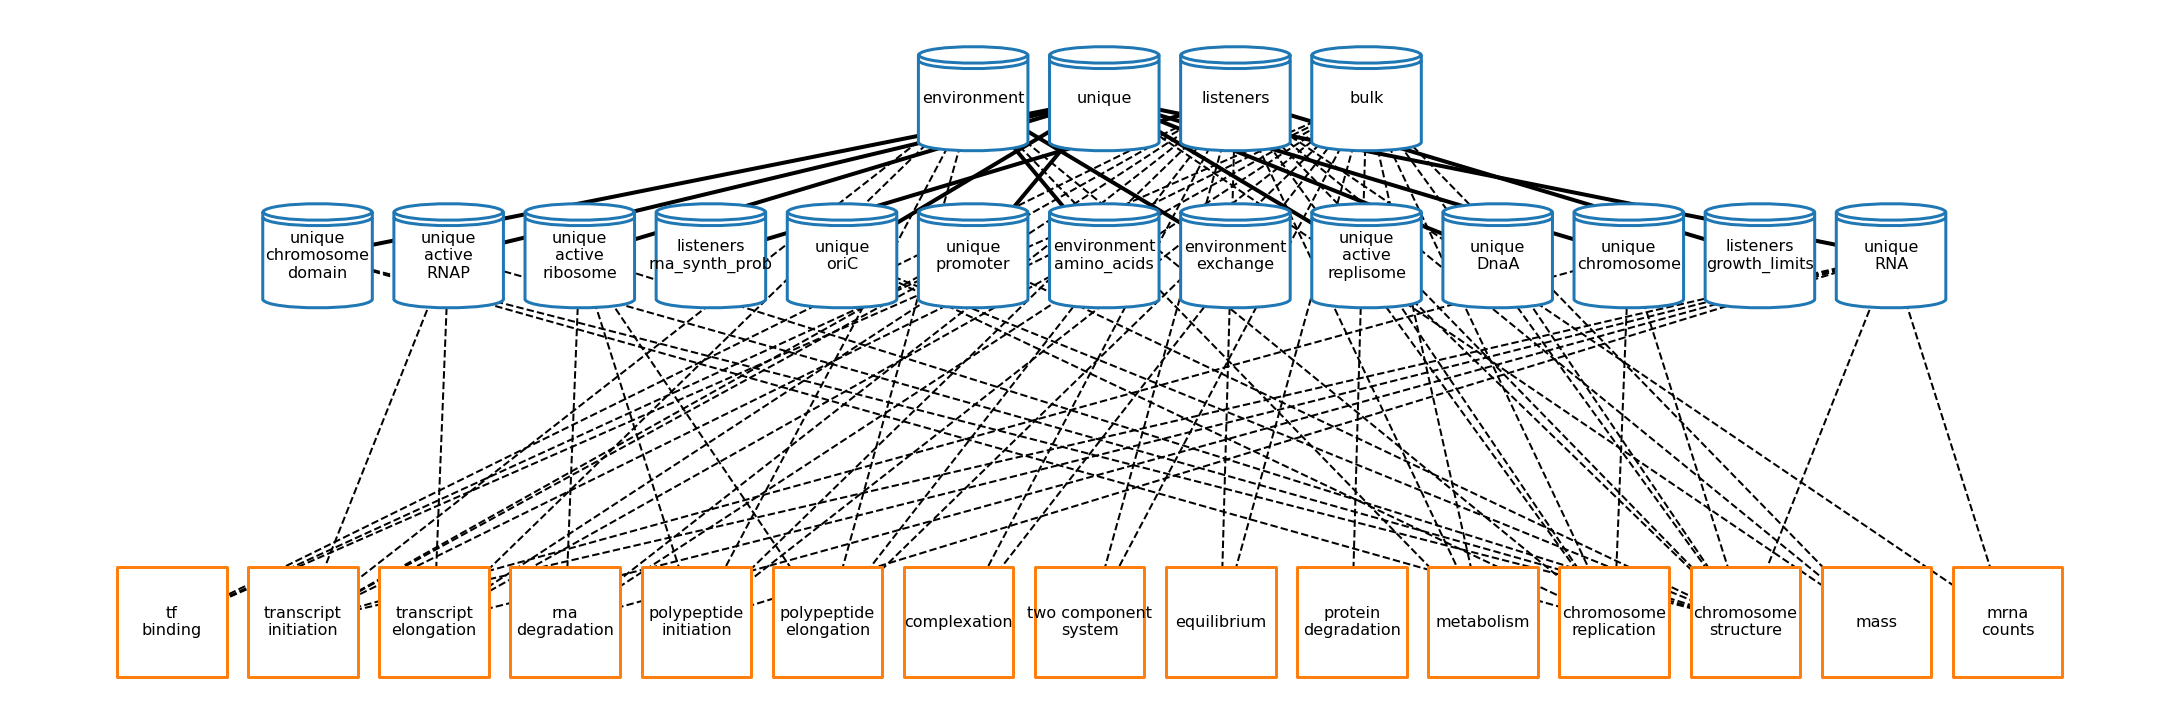

In [6]:
ecoli_composite = Composite({
    'processes': sim_nonpartition.ecoli.processes,
    'topology': sim_nonpartition.ecoli.topology,
})
topology_settings = get_ecoli_master_topology_settings()
topology_settings['font_size'] = 16
fig = plot_topology(ecoli_composite, topology_settings)

### run simulation

In [7]:
nonpartition_output = sim_nonpartition.run()


Simulation ID: c72cd630-24d4-11ec-9fe3-8c85908ac627
Created: 10/03/2021 at 22:34:46
Completed in 17.00 seconds


In [8]:
print(nonpartition_output['listeners']['mass'].keys())

dict_keys(['cell_mass', 'dry_mass', 'water_mass', 'rnaMass', 'rRnaMass', 'tRnaMass', 'mRnaMass', 'dnaMass', 'proteinMass', 'smallMoleculeMass', 'volume', 'proteinMassFraction', 'rnaMassFraction', 'growth', 'instantaniousGrowthRate', 'dryMassFoldChange', 'proteinMassFoldChange', 'rnaMassFoldChange', 'smallMoleculeFoldChange'])


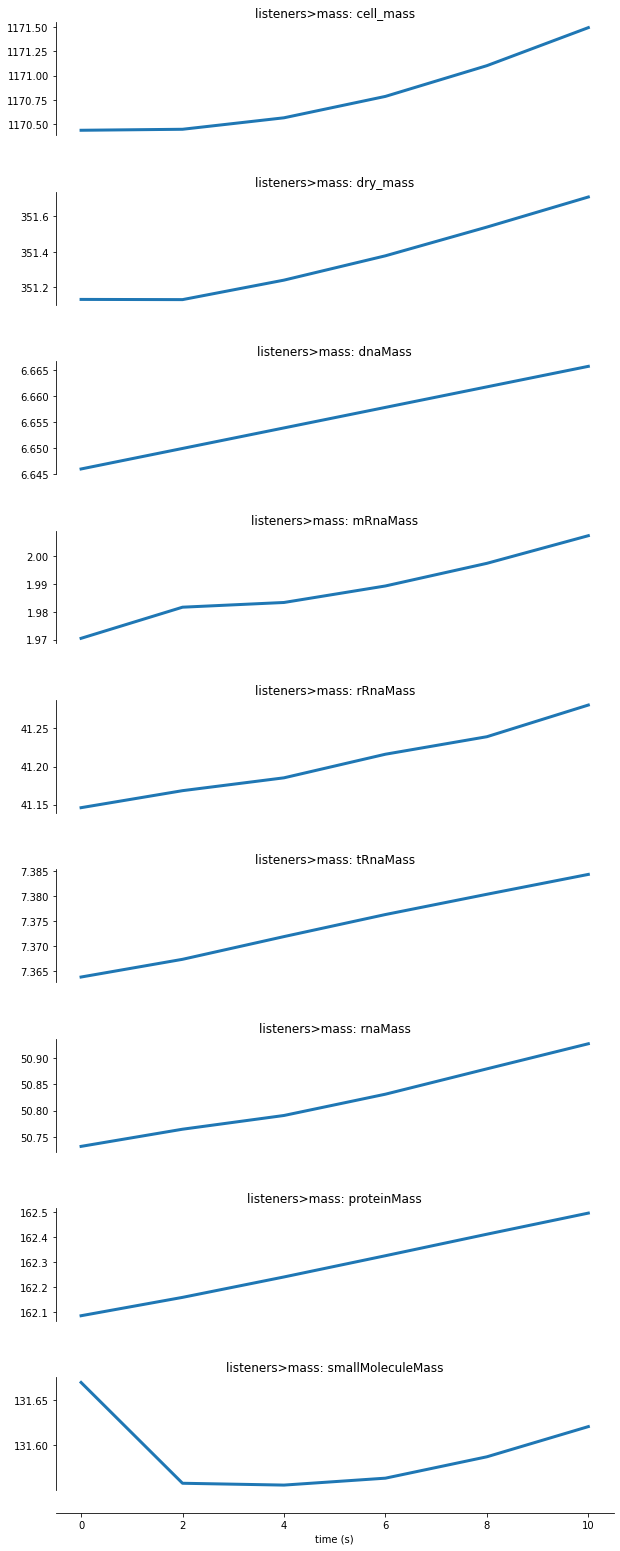

In [9]:
# plot 
fig = plot_variables(
    nonpartition_output, 
    variables=[
        ('listeners', 'mass', 'cell_mass'), 
        ('listeners', 'mass', 'dry_mass'), 
        ('listeners', 'mass', 'dnaMass'), 
        ('listeners', 'mass', 'mRnaMass'), 
        ('listeners', 'mass', 'rRnaMass'), 
        ('listeners', 'mass', 'tRnaMass'), 
        ('listeners', 'mass', 'rnaMass'), 
        ('listeners', 'mass', 'proteinMass'), 
        ('listeners', 'mass', 'smallMoleculeMass'), 
    ],
    column_width=10, row_height=3, row_padding=0.5)

## *E. coli* master
This model uses partitioning.

### initialize `EcoliSim` from file

In [3]:
sim_master = EcoliSim.from_file()
sim_master.total_time = 120
sim_master.divide = False
sim_master.progress_bar = False
sim_master.log_updates = False
sim_master.raw_output = False
sim_master.build_ecoli()

### print the processes

In [4]:
print(pf(sim_master.ecoli.processes))

{ 'allocator': <ecoli.processes.allocator.Allocator object at 0x136fe30a0>,
  'ecoli-chromosome-replication_evolver': <ecoli.processes.partition.Evolver object at 0x13783d7f0>,
  'ecoli-chromosome-replication_requester': <ecoli.processes.partition.Requester object at 0x13783d5e0>,
  'ecoli-chromosome-structure': <ecoli.processes.chromosome_structure.ChromosomeStructure object at 0x12d5faa00>,
  'ecoli-complexation_evolver': <ecoli.processes.partition.Evolver object at 0x13783d730>,
  'ecoli-complexation_requester': <ecoli.processes.partition.Requester object at 0x13783d520>,
  'ecoli-equilibrium_evolver': <ecoli.processes.partition.Evolver object at 0x13783d790>,
  'ecoli-equilibrium_requester': <ecoli.processes.partition.Requester object at 0x13783d580>,
  'ecoli-mass-listener': <ecoli.processes.listeners.mass_listener.MassListener object at 0x132b13160>,
  'ecoli-metabolism': <ecoli.processes.metabolism.Metabolism object at 0x12d5fa9d0>,
  'ecoli-polypeptide-elongation_evolver': <eco

### print the topology

In [5]:
print(pf(sim_master.ecoli.topology))

{ 'allocator': { 'allocate': ('allocate',),
                 'bulk': ('bulk',),
                 'request': ('request',)},
  'ecoli-chromosome-replication_evolver': { 'active_replisomes': ( 'unique',
                                                                   'active_replisome'),
                                            'allocate': { '_path': ( 'allocate',
                                                                     'ecoli-chromosome-replication'),
                                                          'dntps': ('bulk',),
                                                          'ppi': ('bulk',),
                                                          'replisome_monomers': ( 'bulk',),
                                                          'replisome_trimers': ( 'bulk',)},
                                            'chromosome_domains': ( 'unique',
                                                                    'chromosome_domain'),
                       

### plot the topology

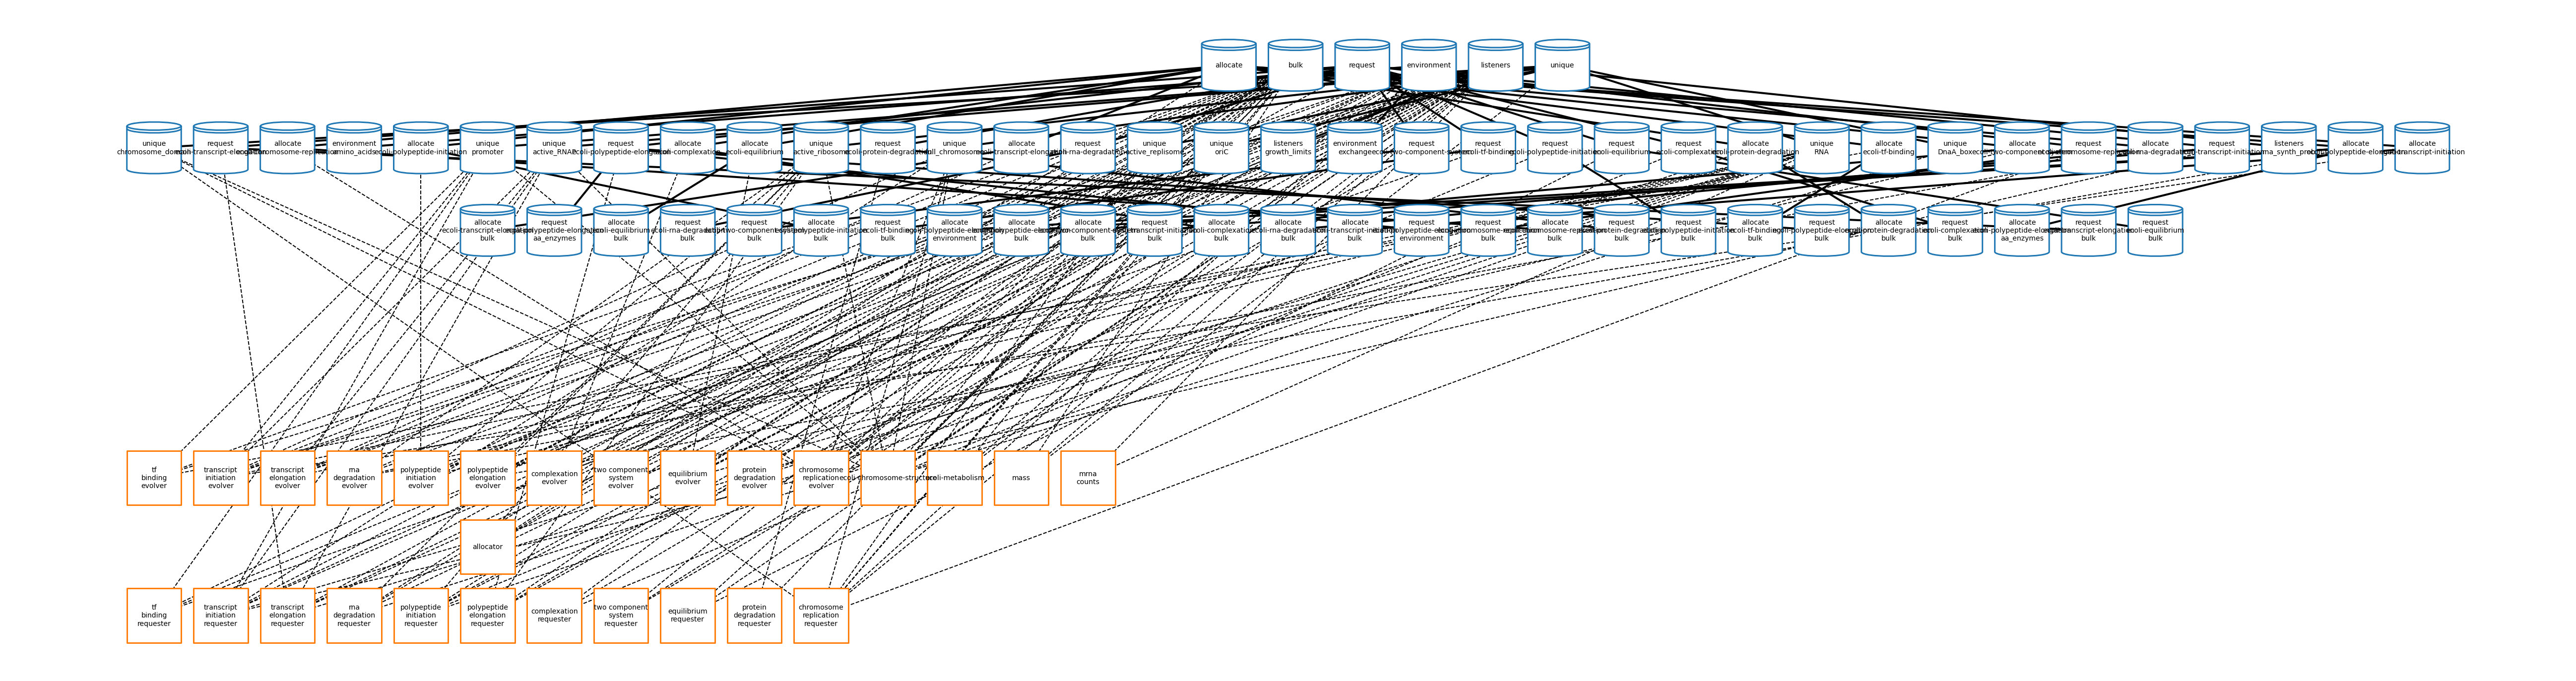

In [6]:
ecoli_master_composite = Composite({
    'processes': sim_master.ecoli.processes,
    'topology': sim_master.ecoli.topology,
})
topology_settings = get_partition_topology_settings()
fig = plot_topology(ecoli_master_composite, topology_settings)

### run simulation

In [13]:
master_output = sim_master.run()


Simulation ID: 7f5fe170-24d5-11ec-af97-8c85908ac627
Created: 10/03/2021 at 22:39:56
Completed in 250.81 seconds


### Mass Fraction Summary Plot

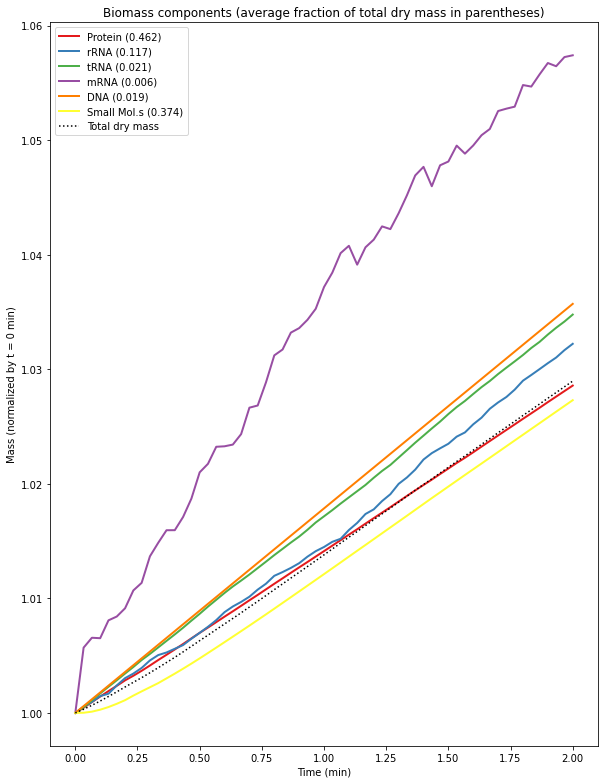

In [14]:
from ecoli.analysis.massFractionSummary import Plot as massFractionPlot

massFractionPlot(master_output)